In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# get data
file_path = 'sample_data/diabetes.csv'
data = pd.read_csv(file_path)
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


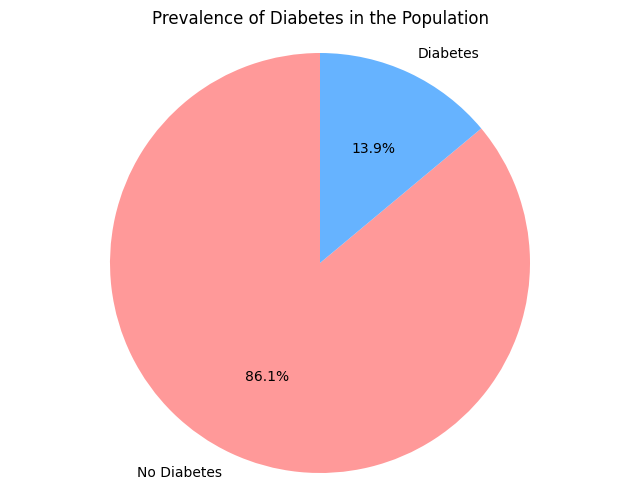

In [ ]:
import matplotlib.pyplot as plt

# Data for pie chart
diabetes_counts = data['Diabetes_binary'].value_counts()
labels = ['No Diabetes', 'Diabetes']
colors = ['#ff9999','#66b3ff']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetes_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Prevalence of Diabetes in the Population')
plt.show()


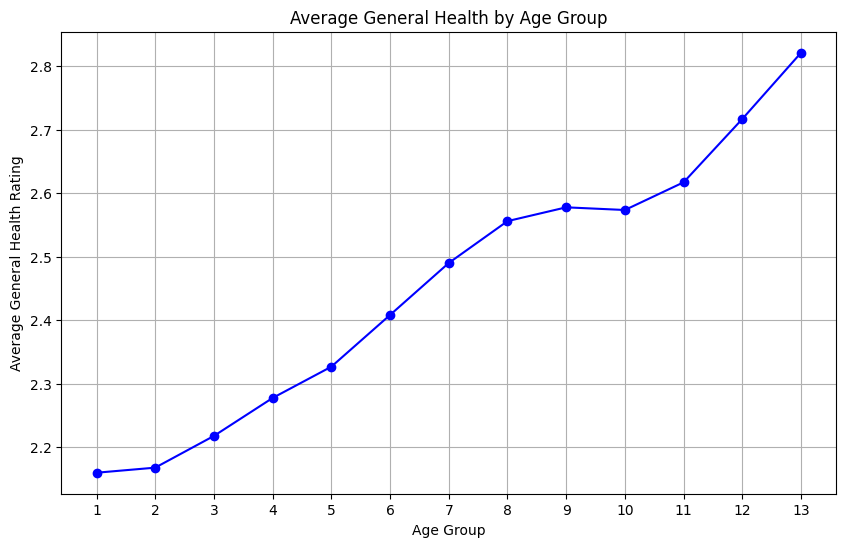

In [ ]:

age_health_avg = data.groupby('Age')['GenHlth'].mean()

# Create a line graph
plt.figure(figsize=(10, 6))
age_health_avg.plot(kind='line', marker='o', color='b')
plt.title('Average General Health by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average General Health Rating')
plt.grid(True)
plt.xticks(list(age_health_avg.index))
plt.show()


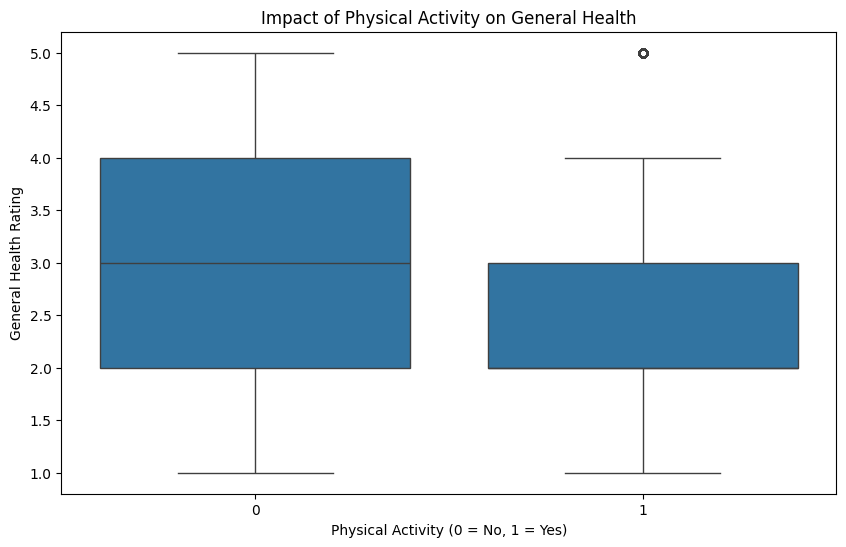

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysActivity', y='GenHlth', data=data)
plt.title('Impact of Physical Activity on General Health')
plt.xlabel('Physical Activity (0 = No, 1 = Yes)')
plt.ylabel('General Health Rating')
plt.show()


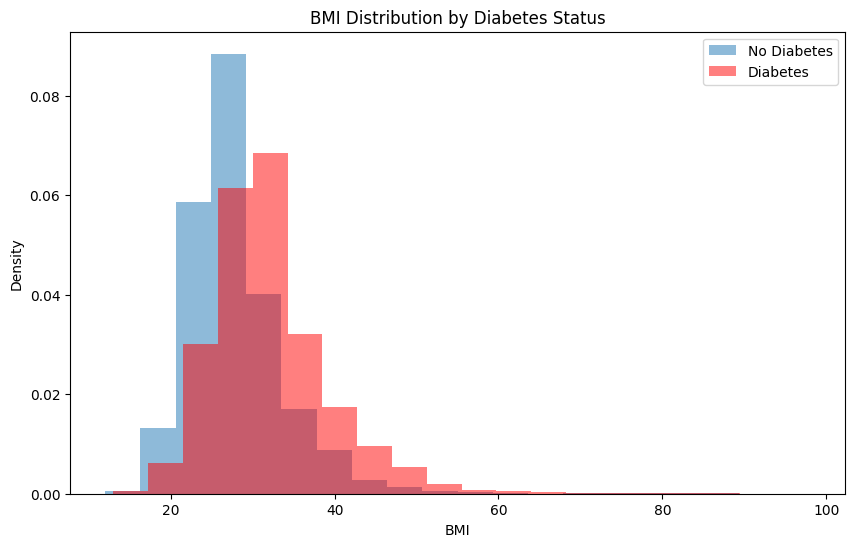

In [ ]:
plt.figure(figsize=(10, 6))
data[data['Diabetes_binary'] == 0]['BMI'].plot(kind='hist', alpha=0.5, label='No Diabetes', density=True, bins=20)
data[data['Diabetes_binary'] == 1]['BMI'].plot(kind='hist', alpha=0.5, label='Diabetes', density=True, bins=20, color='red')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Making predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)


Accuracy of the Logistic Regression model: 0.8658546199936928


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)


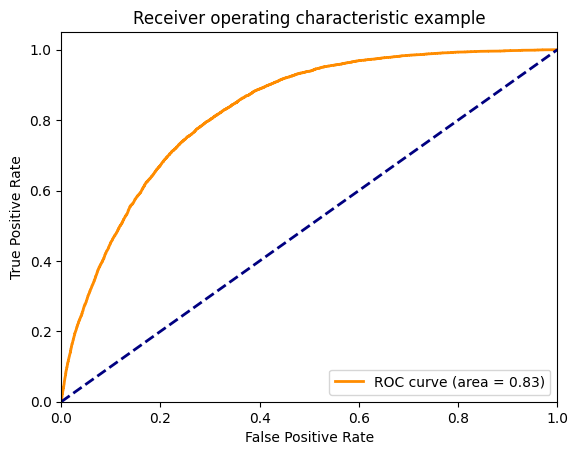

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


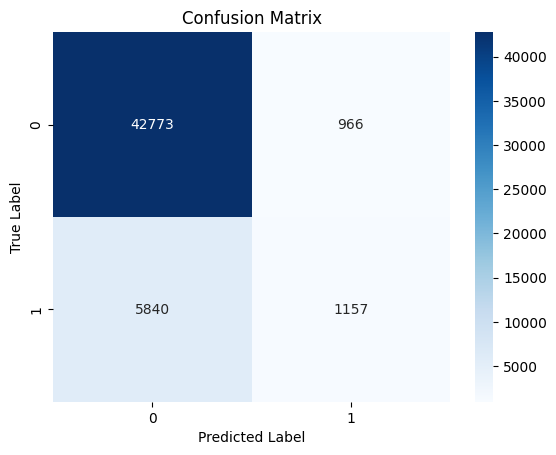

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8379454430778934


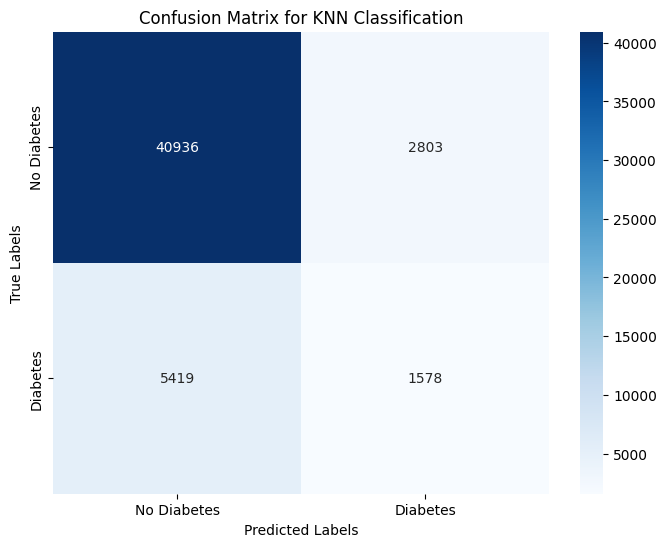

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classification')
plt.show()